In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.ensemble import IsolationForest


In [2]:
# Veri setini yükleme
file_path = "veri/cleaningdataset.csv"  # Veri setinin yolu
df = pd.read_csv(file_path)

# Veri setinin genel bilgileri
print("Veri Seti Genel Bilgileri:")
print(df.info())


Veri Seti Genel Bilgileri:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69865 entries, 0 to 69864
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   name                  69865 non-null  int64  
 1   host_name             69865 non-null  int64  
 2   latitude              69865 non-null  float64
 3   longitude             69865 non-null  float64
 4   host_since            69865 non-null  int64  
 5   host_location         69865 non-null  int64  
 6   host_acceptance_rate  69865 non-null  int64  
 7   property_type         69865 non-null  int64  
 8   room_type             69865 non-null  int64  
 9   price                 69865 non-null  int64  
 10  minimum_nights        69865 non-null  float64
 11  maximum_nights        69865 non-null  float64
 12  availability_30       69865 non-null  float64
 13  availability_365      69865 non-null  float64
 14  number_of_reviews     69865 non-null  float

In [3]:
# Eksik verileri doldurma
df_cleaned = df.copy()

# Sayısal sütunlar için ortalama ile doldurma
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
df_cleaned[numeric_columns] = df_cleaned[numeric_columns].fillna(df_cleaned[numeric_columns].mean())

# Kategorik sütunlar için mod ile doldurma
categorical_columns = df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    df_cleaned[col] = df_cleaned[col].fillna(df_cleaned[col].mode()[0])

# Eksik verilerin kontrolü
print("\nEksik veriler dolduruldu:")
print(df_cleaned.isnull().sum())



Eksik veriler dolduruldu:
name                    0
host_name               0
latitude                0
longitude               0
host_since              0
host_location           0
host_acceptance_rate    0
property_type           0
room_type               0
price                   0
minimum_nights          0
maximum_nights          0
availability_30         0
availability_365        0
number_of_reviews       0
review_scores_rating    0
dtype: int64


In [4]:
# MinMaxScaler ile normalize etme
scaler = MinMaxScaler()
df_normalized = df_cleaned.copy()
df_normalized[numeric_columns] = scaler.fit_transform(df_cleaned[numeric_columns])


In [5]:
# Label Encoding
label_encoders = {}
df_encoded = df_normalized.copy()
for col in categorical_columns:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_normalized[col])
    label_encoders[col] = le

print("\nKategorik değişkenler sayısal hale getirildi.")



Kategorik değişkenler sayısal hale getirildi.


In [6]:
from sklearn.ensemble import IsolationForest

# Isolation Forest kullanarak anomali tespiti
iso_forest = IsolationForest(n_estimators=100, contamination=0.05, random_state=42)
df_encoded['anomaly'] = iso_forest.fit_predict(df_encoded[numeric_columns])

# Anomaliler için etiketleme (0 = Anomaly, 1 = Normal)
df_encoded['anomaly'] = df_encoded['anomaly'].map({1: 1, -1: 0})

# Anomali sayıları
print("\nAnomali ve normal değerlerin sayıları:")
print(df_encoded['anomaly'].value_counts())



Anomali ve normal değerlerin sayıları:
anomaly
1    66371
0     3494
Name: count, dtype: int64


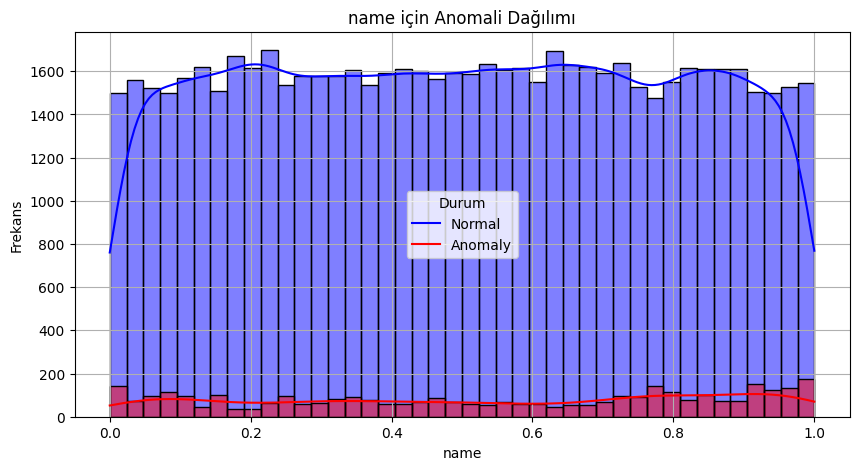

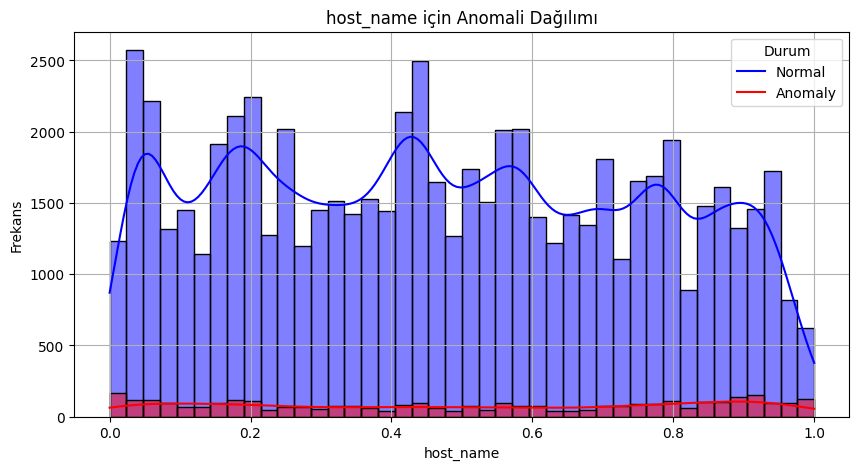

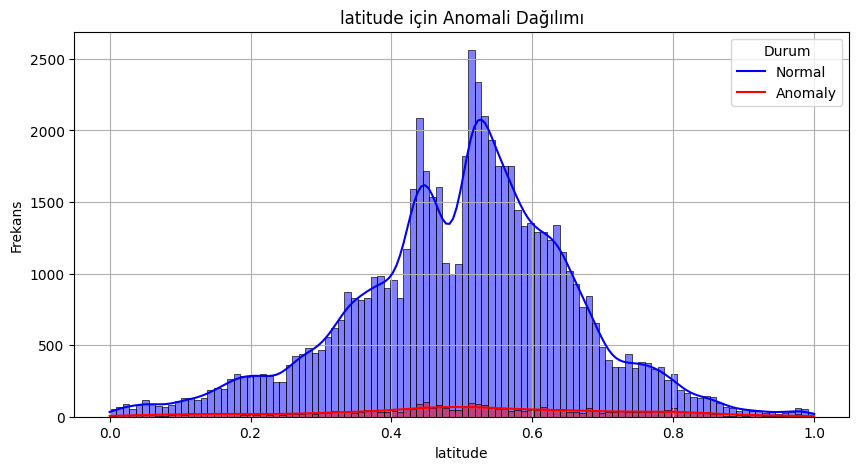

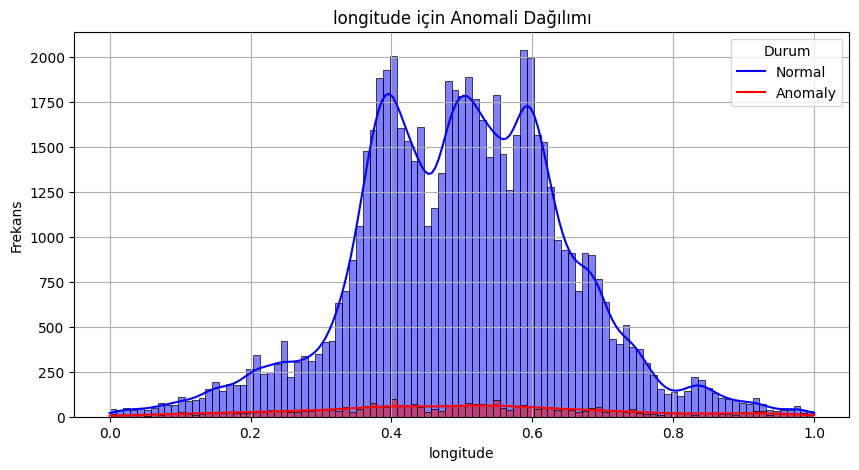

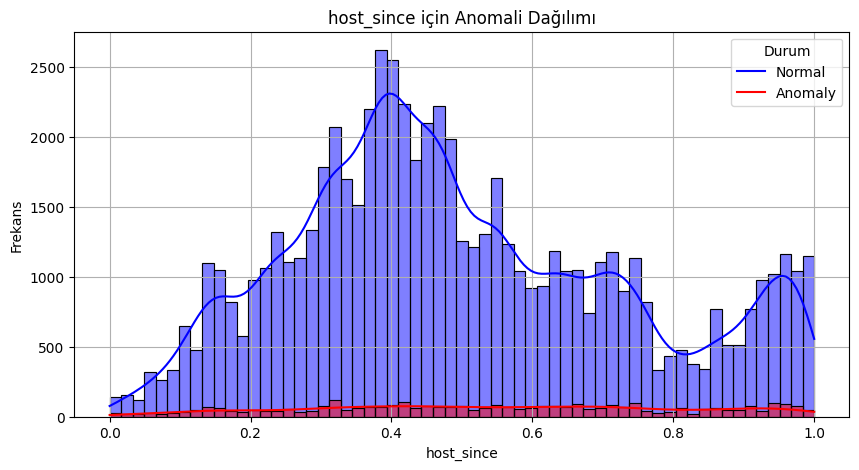

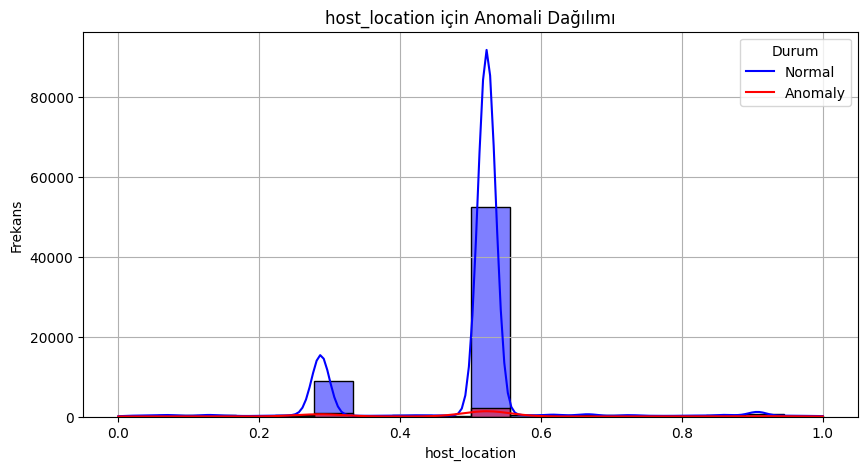

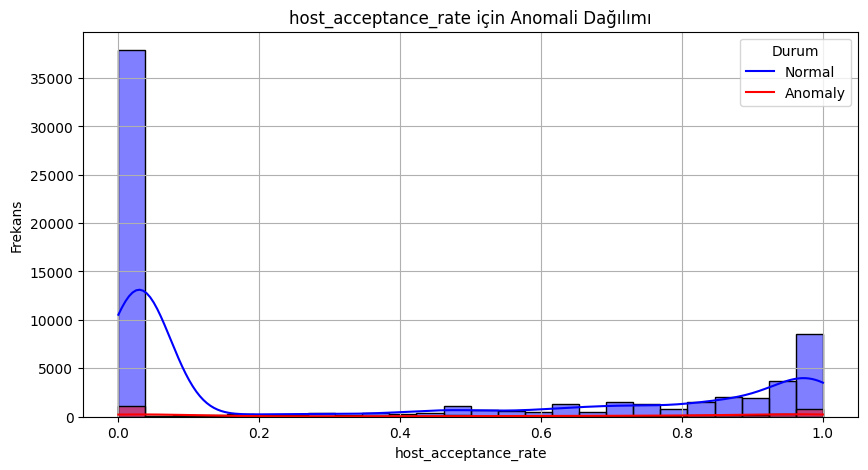

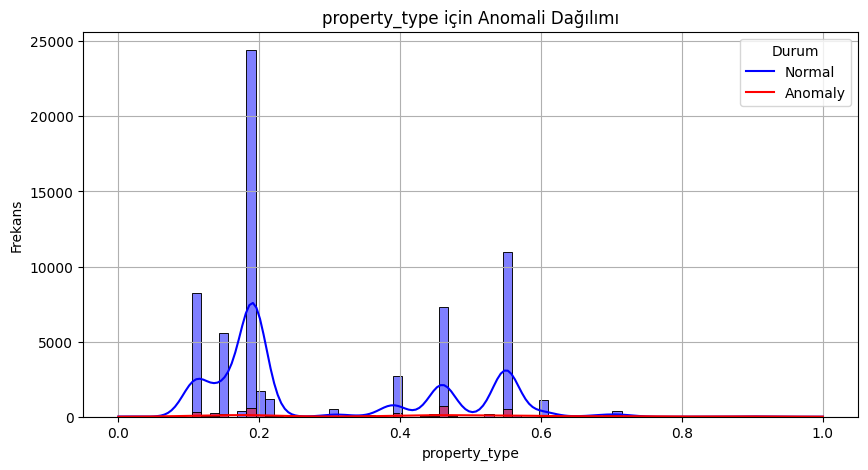

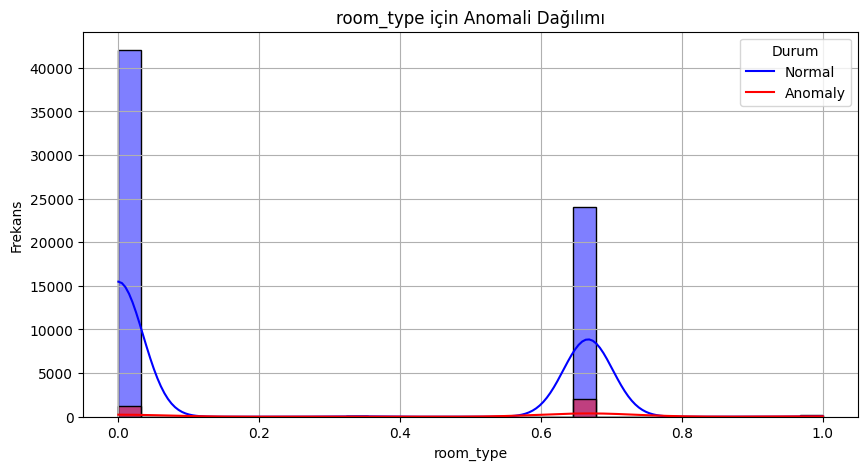

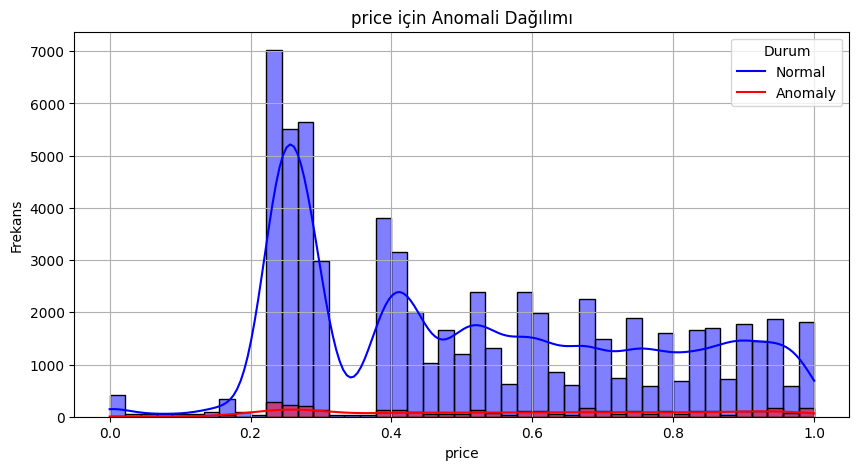

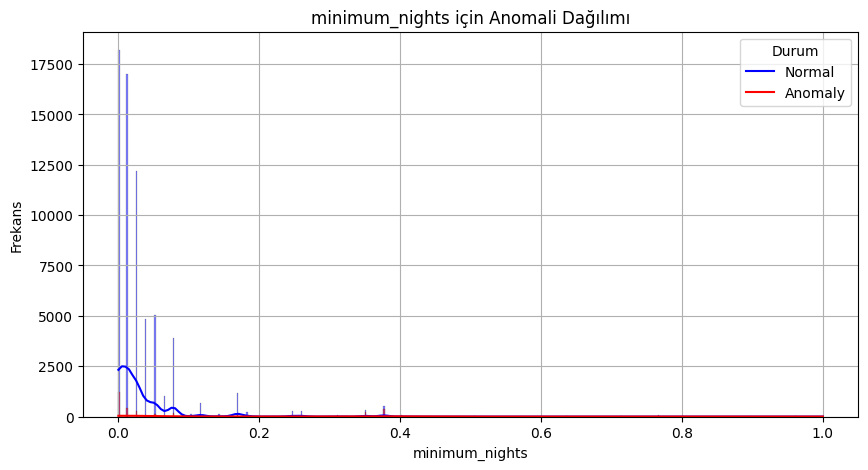

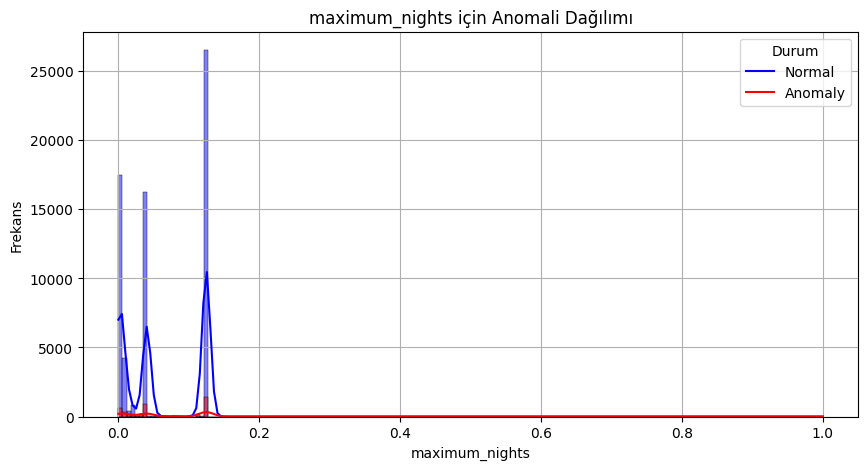

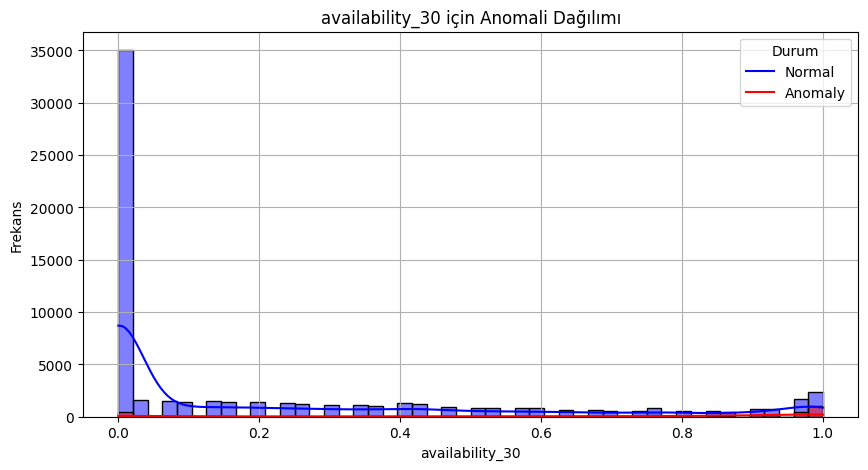

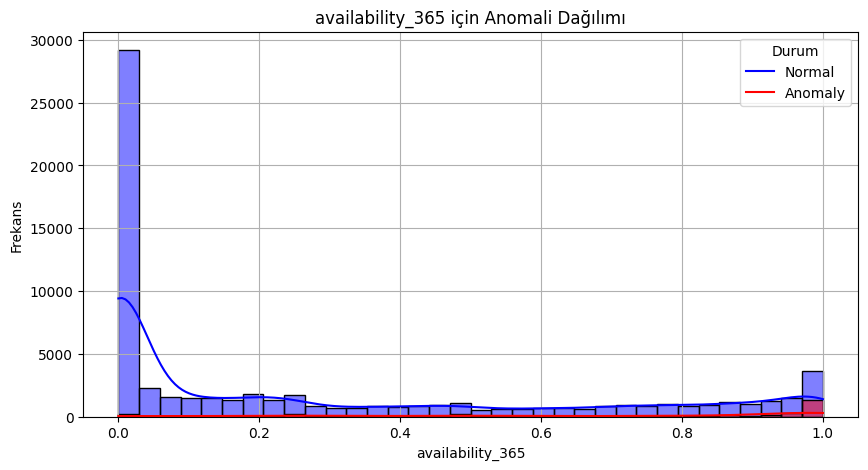

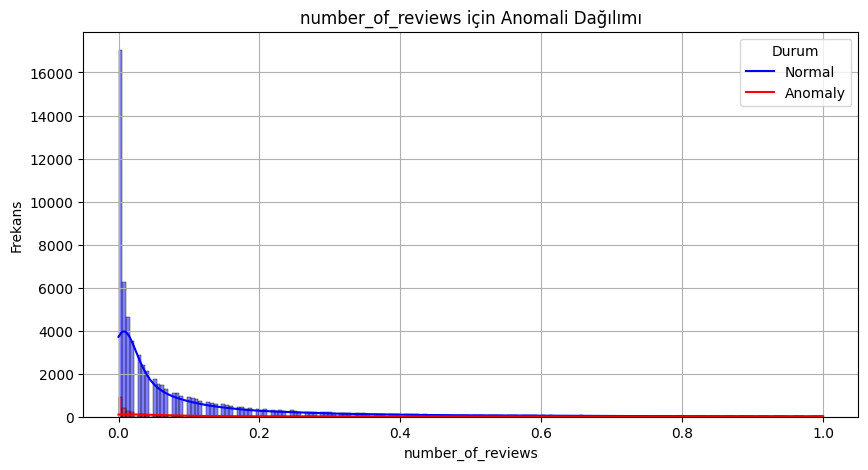

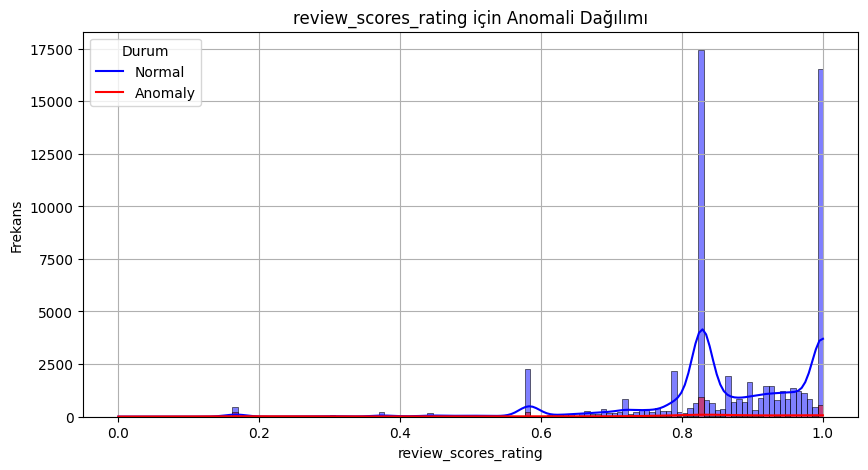

In [9]:
# Anomalileri görselleştirme
for column in numeric_columns:
    plt.figure(figsize=(10, 5))
    sns.histplot(data=df_encoded, x=column, hue='anomaly', kde=True, palette={1: 'blue', 0: 'red'})
    plt.title(f"{column} için Anomali Dağılımı")
    plt.xlabel(column)
    plt.ylabel("Frekans")
    plt.legend(title='Durum', labels=['Normal', 'Anomaly'])
    plt.grid(True)
    plt.show()


In [10]:
# İşlenmiş veriyi kaydetme
df_encoded.to_csv("veri/dataset_with_anomalies.csv", index=False)
print("\nİşlenmiş veri seti kaydedildi: veri/dataset_with_anomalies.csv")



İşlenmiş veri seti kaydedildi: veri/dataset_with_anomalies.csv
